In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [5]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.shape

(10000, 11)

In [12]:
(df['Geography'].value_counts() / df.shape[0]) * 100

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

In [13]:
df['Gender'].value_counts(normalize=True)*100

Male      54.57
Female    45.43
Name: Gender, dtype: float64

In [14]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

In [15]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:
df.shape

(10000, 12)

In [17]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

In [18]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [19]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [20]:
X.shape

(10000, 11)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_train_scaled.shape, X_test_scaled.shape

((8000, 11), (2000, 11))

In [29]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [30]:
model= Sequential()

In [31]:
model.add(Dense(11,activation='sigmoid', input_dim=11))
model.add(Dense(11, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [36]:
history = model.fit(X_train_scaled, y_train, batch_size=50, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 3ms/step - loss: 0.5792 - accuracy: 0.7616 - val_loss: 0.5118 - val_accuracy: 0.7975
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7972 - val_loss: 0.4946 - val_accuracy: 0.7975
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7972 - val_loss: 0.4854 - val_accuracy: 0.7975
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7972 - val_loss: 0.4742 - val_accuracy: 0.7975
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.7972 - val_loss: 0.4618 - val_accuracy: 0.7975
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.7972 - val_loss: 0.4508 - val_accuracy: 0.7975
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.7969 - val_loss: 0.4427 - val_accuracy: 0.7994

In [56]:
model.layers[1].get_weights()

[array([[-0.93747264,  0.8800046 , -0.72354275, -0.7555975 ,  0.4160221 ,
          0.34882063,  1.1049057 ,  1.1551565 , -0.5088628 , -0.43578073,
          0.30919865],
        [ 0.5453291 , -0.6844848 , -0.07806092,  0.92709404, -0.63088024,
         -0.26550606, -0.52025986, -0.21062835,  0.52504545,  0.4946539 ,
         -0.4664979 ],
        [-0.76475877,  1.5486103 , -0.5078314 , -1.1633534 ,  0.7431674 ,
          1.2927201 ,  0.51494205,  0.23183337, -0.41943693, -0.62104815,
          0.9018014 ],
        [-0.68455625,  1.0214905 , -0.36821964, -0.23494552,  0.48207596,
          0.6621221 ,  0.2743953 ,  0.42173454, -0.4952659 , -0.9339158 ,
          0.94095504],
        [ 2.067711  , -1.2344645 ,  1.7824466 ,  1.4484868 , -1.6958083 ,
         -1.5844918 , -2.0099778 , -2.1676955 ,  1.9339116 ,  1.5962771 ,
         -1.5857798 ],
        [ 0.66775507, -0.7832407 ,  0.7603121 ,  0.5283952 ,  0.05312118,
         -0.8893297 , -0.7345768 , -0.04991755,  0.4491649 ,  0.2459458

In [57]:
model.layers[0].get_weights()

[array([[ 0.18504207, -0.15746354, -0.57590497,  0.19044198,  0.07546922,
         -0.16911148,  0.12055779,  0.37857145,  0.35600686, -0.16202483,
         -0.19709045],
        [ 0.2897031 ,  1.9996537 ,  0.23831244, -1.551394  , -0.8918233 ,
          1.7858454 ,  1.7687609 ,  0.27830568, -0.95155907,  0.51082397,
         -1.0978379 ],
        [ 0.27310485,  0.36088592, -0.2293629 ,  0.34539324, -0.1249856 ,
          0.23393853, -0.13103114,  0.3256949 , -0.20720537, -0.29180685,
         -0.01523988],
        [-1.4311877 , -0.47425926, -0.2605792 , -0.14036955, -0.6054849 ,
         -0.1833244 ,  0.14093767,  0.1790232 , -0.18810521,  0.62631756,
         -0.36255503],
        [-1.2754809 ,  0.64452773, -0.77725565, -0.82586354, -3.8105652 ,
          0.5157339 ,  0.24643825, -0.58334666, -0.7260896 , -0.9824897 ,
         -0.63243026],
        [-0.19817287,  0.23204921, -0.35033882,  0.44602126, -0.18333809,
          0.39716437,  0.2175517 ,  0.24486314,  0.38551497,  0.0154791

In [58]:
model.layers[2].get_weights()

[array([[ 1.5000778 ],
        [-1.1650319 ],
        [ 1.5808669 ],
        [ 1.163016  ],
        [-1.2468585 ],
        [-0.82452023],
        [-1.5427829 ],
        [-1.4763751 ],
        [ 1.3622624 ],
        [ 1.1388997 ],
        [-0.5869021 ]], dtype=float32),
 array([0.03249362], dtype=float32)]

In [37]:
y_predict = model.predict(X_test_scaled)

In [38]:
y_predict

array([[0.05809078],
       [0.12231049],
       [0.09012145],
       ...,
       [0.02944094],
       [0.0287672 ],
       [0.43892223]], dtype=float32)

In [40]:
y_predict = np.where(y_predict>0.5,1,0)

In [43]:
y_predict

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test, y_predict)

0.8615

In [52]:
history.history

{'loss': [0.5792261362075806,
  0.5009185075759888,
  0.4900244474411011,
  0.4790670871734619,
  0.4662401080131531,
  0.45323532819747925,
  0.4420466125011444,
  0.43434837460517883,
  0.4293321371078491,
  0.42625999450683594,
  0.4246879518032074,
  0.42291343212127686,
  0.42179566621780396,
  0.4208531081676483,
  0.4191630184650421,
  0.4179469048976898,
  0.41650572419166565,
  0.415157675743103,
  0.413504958152771,
  0.4118175506591797,
  0.41003313660621643,
  0.40848061442375183,
  0.40684977173805237,
  0.4051910638809204,
  0.4034927785396576,
  0.4016697406768799,
  0.3999788761138916,
  0.3987537622451782,
  0.39692264795303345,
  0.39532992243766785,
  0.3936275839805603,
  0.3921617865562439,
  0.3903675973415375,
  0.3887445032596588,
  0.38724464178085327,
  0.3854046165943146,
  0.3838566541671753,
  0.38248834013938904,
  0.3807268440723419,
  0.3793850243091583,
  0.3781844973564148,
  0.3763420581817627,
  0.37501370906829834,
  0.3736753761768341,
  0.37242558

In [46]:
import matplotlib.pyplot as plt

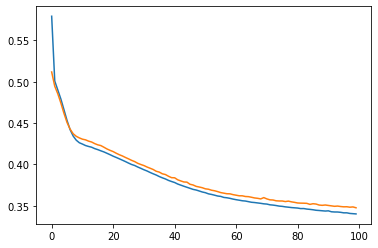

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

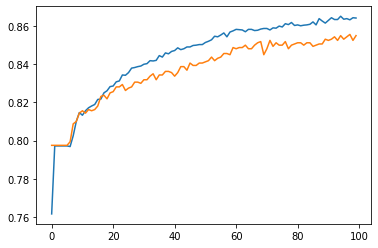

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])